In [1]:
import keras
keras.__version__

'2.8.0'

In [2]:
#사용할 데이터 : https://www.kaggle.com/c/dogs-vs-cats/data

import os,shutil
#shutil 모듈은 파일과 파일 모음에 대한 여러 가지 고수준 연산을 제공
#특히, 파일 복사와 삭제를 지원하는 함수가 제공
#https://koreapy.tistory.com/1172

In [5]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'
# 소규모 데이터셋을 저장할 디렉터리 경로
base_dir='./datasets/cats_and_dogs_small'

# 디렉토리가 있는지 확인해보고, 있으면 삭제하고 다시 만들거나 없으면 다시 만드는 함수
if os.path.exists(base_dir):
    shutil.rmtree(base_dir) #디렉토리가 있으면 삭제 
os.mkdir(base_dir) #없으면 경로를 새로 만들게 함


# 이미지를 3가지로 나눌 것인데, 학습용 데이터/검증용 데이터(validation)/테스트용 데이터
#검증용 데이터(validation) : 테스트가 잘 되고 있는지 확인하는 데이터
#train과 validation을 쓴 model이 나오면 test용 데이터로 model을 검증하게 됨
#validation이 없어도 되지만, 그래도 검증 정확도를 높이는데 도움이 된다.

# 분할을 위한 디렉터리 만들기
train_dir=os.path.join(base_dir,'train') #경로와 파일명을 결합하거나 분할된 경로를 하나로 정리
os.mkdir(train_dir) #폴더 생성하기

validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir=os.path.join(train_dir,'cats') #train_dir 아래에 만든다
os.mkdir(train_cats_dir)

#훈련용 강아지 사진 디렉터리
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

#검증용 고양이 사진 디렉터리
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

#검증용 강아지 사진 디렉터리
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

#테스트용 고양이 사진 디렉터리
test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

#테스트용 강아지 사진 디렉터리
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사합니다. 
print('Copy files.... ')
print('---traing file(s) (cat).... ')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir 복사합니다. 
print('---validation file(s) (cat).... ')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir 복사합니다. 
print('---test file(s) (cat).... ')
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

# 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사합니다. 
print('---traing file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir 복사합니다. 
print('---validation file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir 복사합니다. 
print('---test file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

Copy files.... 
---traing file(s) (cat).... 
---validation file(s) (cat).... 
---test file(s) (cat).... 
---traing file(s) (dog).... 
---validation file(s) (dog).... 
---test file(s) (dog).... 


In [10]:
print('훈련용 고양이 이미지 전체 개수: ',len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 전체 개수: ',len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 전체 개수: ',len(os.listdir(test_cats_dir)))
print("\n")
print('훈련용 강아지 이미지 전체 개수: ',len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 전체 개수: ',len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 전체 개수: ',len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수:  1000
검증용 고양이 이미지 전체 개수:  500
테스트용 고양이 이미지 전체 개수:  500


훈련용 강아지 이미지 전체 개수:  1000
검증용 강아지 이미지 전체 개수:  500
테스트용 강아지 이미지 전체 개수:  500


CNN-MP-CNN-MP-CNN-Flatten-Dense 순으로 실행했는데,<br>
지금은 이미지가 많고 종류가 다르기 때문에 <br>
맨 앞에 CNN과 MP를 하나 더 추가할 것이다<br>
CNN으로 특징을 살려내고, MP로 축소하고<br>

In [11]:
#신경망 만들기

from keras import layers
from keras import models

#신경망을 총 11개 사용할 것이다
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#특정 부분의 기울기를 크게 해서 변별력을 키우는 sigmoid, 이진 분류를 하기 위해 사용한다

각각 렐루와 시그모이드 함수
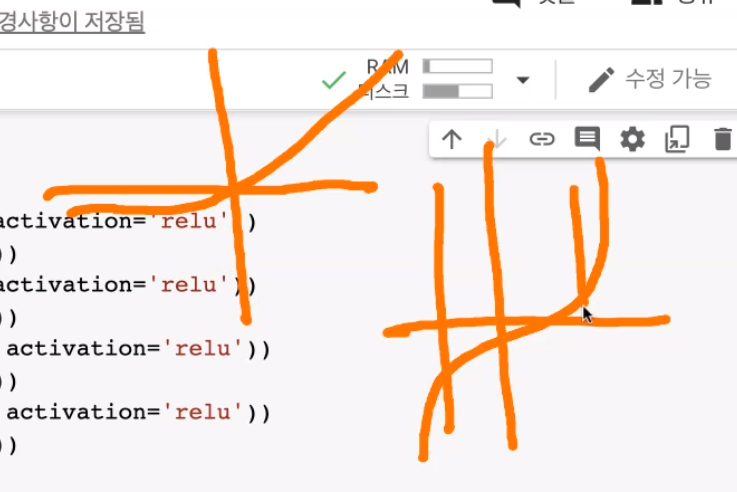 

In [15]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#범주면 카테고리컬 엔트로피
#이진 분류면 바이너리 크로스엔트로피
#옵티마이저는 가중치를 조절해줌
#매트릭스는 GPU를 조정

In [18]:
#이미지를 전부 다 적절한 사이즈로 통일해줘야 함 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
#학습 시키기
#이미지의 사이즈 조절하는 위에서 제너레이터를 두개 만들었는데,
#제너레이터를 변환해가며 학습하겠다는 의미이다.
model.fit_generator(
    train_generator,
    epochs=30,
    steps_per_epoch=100, #반복하는 스텝 횟수
    validation_data=validation_generator,
    validation_steps=50
)

C:\Users\hyerin\AppData\Local\Temp/ipykernel_9648/2514739188.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/30
100/100 [==============================] - 89s 869ms/step - loss: 0.6887 - acc: 0.5365 - val_loss: 0.6681 - val_acc: 0.6010
Epoch 2/30
100/100 [==============================] - 71s 710ms/step - loss: 0.6535 - acc: 0.6155 - val_loss: 0.6593 - val_acc: 0.5850
Epoch 3/30
100/100 [==============================] - 58s 580ms/step - loss: 0.6078 - acc: 0.6605 - val_loss: 0.6159 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 63s 629ms/step - loss: 0.5708 - acc: 0.6990 - val_loss: 0.5947 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 61s 609ms/step - loss: 0.5355 - acc: 0.7230 - val_loss: 0.5674 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 55s 547ms/step - loss: 0.5104 - acc: 0.7495 - val_loss: 0.5757 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 47s 473ms/step - loss: 0.4874 - acc: 0.7585 - val_loss: 0.5783 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 4

In [20]:
# 모델 저장하기
model.save('cats_and_dogs_small_1.h5')

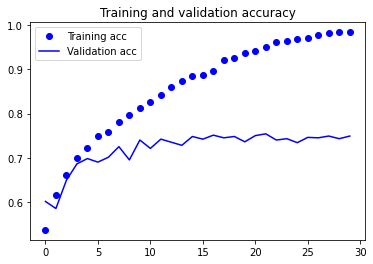

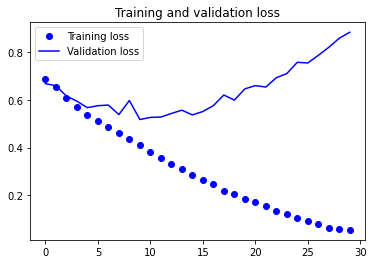

In [21]:
history = model.history

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#Training acc는 진행하면 할수록 정확도가 높아지고 있음
#validation acc는 어느 곳에서 검증을 해야할지 고민을 해봐야 함

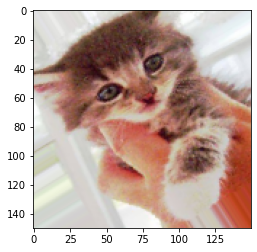

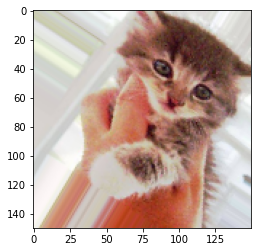

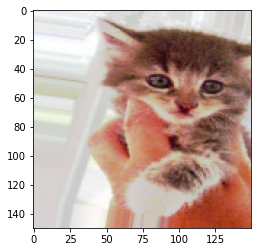

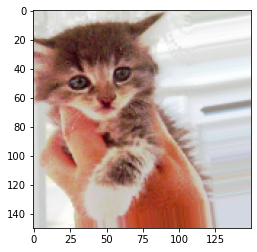

In [23]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
#40도 내에서 계속 돌려볼 것이다
#shift는 수평,수직으로 0.2정도로 틀어본다는 것이다(=20%)
#확대
#축소
#수평으로 좌우를 바꿔서 이미지를 증식해보는 것이다
#이미지를 옆으로 밀면, 빈 공간은 근처의 비슷한 색으로 채워줄 것이다

# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\hyerin\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\hyerin\AppData\Local\Temp/ipykernel_9648/2042259684.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 70s 696ms/step - loss: 0.6689 - acc: 0.5680 - val_loss: 0.6383 - val_acc: 0.6240
Epoch 2/100
100/100 [==============================] - 61s 610ms/step - loss: 0.6531 - acc: 0.6055
Epoch 3/100
100/100 [==============================] - 54s 540ms/step - loss: 0.6328 - acc: 0.6370
Epoch 4/100
100/100 [==============================] - 55s 545ms/step - loss: 0.6210 - acc: 0.6460
Epoch 5/100
100/100 [==============================] - 56s 552ms/step - loss: 0.6008 - acc: 0.6835
Epoch 6/100
100/100 [==============================] - 56s 564ms/step - loss: 0.6026 - acc: 0.6680
Epoch 7/100
100/100 [==============================] - 72s 713ms/step - loss: 0.6039 - acc: 0.6660
Epoch 8/100
100/100 [==============================] - 61s 607ms/step - loss: 0.5887 - acc: 0.6825
Epoch 9/100
100/100 [==============================] - 65s 645ms/step - loss: 0.5856 - acc: 0.6890
Epoch 10/100
100/100 [==============================] - 62s 619ms/step -

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()